# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [18]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install getpass
!pip install kaggle
# Without --no-cache-dir, smaller aws instances may have trouble installing

ERROR: Could not find a version that satisfies the requirement getpass (from versions: none)
ERROR: No matching distribution found for getpass
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=e54a08437c650ed17f15f4d946bc8ab8049c8c33daabacd327540790922b1dcc
  Stored in directory: /root/.cache/pip/wheels/11/ec/8f/80c32ff2501f7b1a76f4df651a0242314d229a5d3e5130bd01
Successfully built kaggle


### Setup Kaggle API Key

In [21]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [22]:
import getpass
kaggle_username = getpass.getpass("Enter username: ")

Enter username:  ········


In [14]:
kaggle_key = getpass.getpass("Enter key: ")

Enter key:  ········


In [23]:
# Fill in your user name and key from creating the kaggle account and API token file
import json

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [24]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 8.25MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [25]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [28]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [29]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [30]:
# specify columns to exclude
exclude_columns = ['casual', 'registered']
train = train.drop(labels=exclude_columns, axis=1)
# create a TabularPredictor and train it with the train dataset
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, presets=['best_quality'], time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20221224_184740/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221224_184740/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [31]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.756939      10.922893  442.308098                0.000765           0.322372            3       True         15
1   RandomForestMSE_BAG_L2  -53.377740       9.987059  409.373799                0.612160          26.120945            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.688218      10.090214  391.317974                0.715315           8.065120            2       True         14
3          LightGBM_BAG_L2  -55.060873       9.594653  407.799660                0.219754          24.546806            2       True         11
4          CatBoost_BAG_L2  -55.556829       9.423193  443.250344                0.048295          59.997489            2       True         13
5        LightGBMXT_BAG_L2  -60.254232      12.667403  436.376942         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Plot models scores

<AxesSubplot:xlabel='model'>

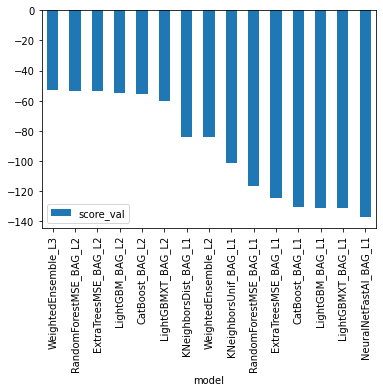

In [32]:
predictor.leaderboard(silent=True).plot(kind='bar', x='model', y='score_val')

### Create predictions from test dataset

In [33]:
predictions = predictor.predict(test)
predictions.head()

0    22.973293
1    41.250496
2    45.293793
3    47.462463
4    51.148788
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [34]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.543510
std        90.182022
min         3.030426
25%        20.302902
50%        62.918983
75%       170.107224
max       364.348938
Name: count, dtype: float64

In [35]:
# How many negative values do we have?
predictions[predictions < 0.0].count()

0

In [36]:
# Set them to zero
predictions = predictions.where(predictions > 0.0, 0.0)

In [37]:
predictions.head()

0    22.973293
1    41.250496
2    45.293793
3    47.462463
4    51.148788
Name: count, dtype: float32

### Set predictions to submission dataframe, save, and submit

In [38]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 359kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                                       status    publicScore  privateScore  
----------------------------  -------------------  ------------------------------------------------  --------  -----------  ------------  
submission.csv                2022-12-24 18:58:19  first raw submission                              complete  1.80999      1.80999       
submission_new_model_hpo.csv  2022-12-24 18:20:39  new features with model specific hyperparameters  complete  0.54333      0.54333       
submission_new_hpo.csv        2022-12-24 18:13:37  new features with hyperparameters                 complete  0.59423      0.59423       
submission_new_features.csv   2022-12-24 18:01:44  new features                                      complete  0.59711      0.59711       


#### Initial score of 1.80999

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

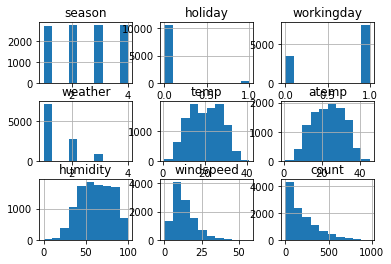

In [41]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [42]:
# create a new feature
datetime_train = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
train['hour'] = datetime_train.dt.hour
train['day'] = datetime_train.dt.day
train['month'] = datetime_train.dt.month
train.drop(["datetime"], axis=1, inplace=True)


datetime_test = pd.to_datetime(test['datetime'], format='%Y-%m-%d %H:%M:%S')
test['hour'] = datetime_test.dt.hour
test['day'] = datetime_test.dt.day
test['month'] = datetime_test.dt.month
test.drop(["datetime"], axis=1, inplace=True)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [43]:
train["season"] = train['season'].astype('category')
train["weather"] = train['weather'].astype('category')
test["season"] = test['season'].astype('category')
test["weather"] = test['season'].astype('category')

In [44]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


array([[<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

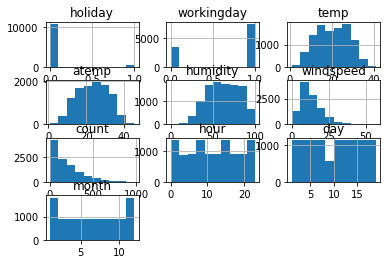

In [45]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [46]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train,presets=['best_quality'], time_limit=600)

No path specified. Models will be saved in: "AutogluonModels/ag-20221224_185824/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221224_185824/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [47]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -49.866882      49.077295  491.118980                0.000898           0.374301            3       True         16
1          CatBoost_BAG_L2  -50.192293      47.842559  457.636346                0.100569          62.686939            2       True         13
2     ExtraTreesMSE_BAG_L2  -50.329580      48.353137  402.424254                0.611147           7.474847            2       True         14
3   RandomForestMSE_BAG_L2  -50.831541      48.364680  420.582893                0.622690          25.633486            2       True         12
4          LightGBM_BAG_L2  -50.924689      47.865482  417.580367                0.123492          22.630960            2       True         11
5      WeightedEnsemble_L2  -51.384619      46.345086  357.363095         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDist_BAG_L1': -119.3656013058328

In [48]:
# Remember to set all negative values to zero
predictions_new = predictor_new_features.predict(test)
predictions_new = predictions_new.where(predictions_new > 0.0, 0.0)

In [49]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [50]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 349kB/s]
Successfully submitted to Bike Sharing Demand

In [51]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                                       status    publicScore  privateScore  
----------------------------  -------------------  ------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv   2022-12-24 19:10:20  new features                                      complete  0.57182      0.57182       
submission.csv                2022-12-24 18:58:19  first raw submission                              complete  1.80999      1.80999       
submission_new_model_hpo.csv  2022-12-24 18:20:39  new features with model specific hyperparameters  complete  0.54333      0.54333       
submission_new_hpo.csv        2022-12-24 18:13:37  new features with hyperparameters                 complete  0.59423      0.59423       


#### New Score of 0.57182

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [52]:
predictor_new_hpo = TabularPredictor(label='count', 
                                     eval_metric='root_mean_squared_error').fit(train_data=train,
                                                                                presets=['best_quality'], 
                                                                                time_limit=600,
                                                                                num_bag_folds=10, 
                                                                                num_bag_sets=30, 
                                                                                num_stack_levels=2)

No path specified. Models will be saved in: "AutogluonModels/ag-20221224_191022/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=2, num_bag_folds=10, num_bag_sets=30
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221224_191022/"
AutoGluon Version:  0.6.1
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [53]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -49.567127      45.777587  443.187896                0.001205           0.499473            3       True         13
1          CatBoost_BAG_L2  -49.818266      43.864451  322.141194                0.125259          72.380382            2       True         10
2          LightGBM_BAG_L2  -50.308921      43.875971  278.205700                0.136780          28.444889            2       True          8
3     ExtraTreesMSE_BAG_L2  -50.401935      44.346777  256.720159                0.607585           6.959348            2       True         11
4      WeightedEnsemble_L4  -50.524695      47.267443  556.167886                0.000713           0.425257            4       True         17
5   RandomForestMSE_BAG_L2  -50.556319      44.358971  270.159071         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L3': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDi

In [54]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo = predictions_new_hpo.where(predictions_new_hpo > 0.0, 0.0)

In [55]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 337kB/s]
Successfully submitted to Bike Sharing Demand

In [57]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                                       status    publicScore  privateScore  
----------------------------  -------------------  ------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv        2022-12-24 19:22:20  new features with hyperparameters                 complete  0.59301      0.59301       
submission_new_features.csv   2022-12-24 19:10:20  new features                                      complete  0.57182      0.57182       
submission.csv                2022-12-24 18:58:19  first raw submission                              complete  1.80999      1.80999       
submission_new_model_hpo.csv  2022-12-24 18:20:39  new features with model specific hyperparameters  complete  0.54333      0.54333       


#### New Score of 0.59301

### Extra: Individual models Hyper parameter optimization

In [58]:
# hyperparameter values for NeuralNetTorch
nn_options = {
    "learning_rate": ag.space.Real(lower=1e-4, upper=1e-1, log=True),
    "num_epochs": ag.space.Int(lower=10, upper=1000),
    "batch_size": ag.space.Int(lower=16, upper=512),
    "optimizer": ag.space.Categorical("adam", "sgd", "rmsprop"),
}

# hyperparameter values for lightGBM gradient boosted trees
gbm_options = {  
    'num_leaves': ag.space.Int(lower=26, upper=66, default=31),
    "learning_rate": ag.space.Real(lower=0.01, upper=1.0, log=True),
    "max_depth": ag.space.Int(lower=1, upper=10),
    "min_data_in_leaf": ag.space.Int(lower=10, upper=30, default=20),
    'n_estimators': ag.space.Int(lower=50, upper=500),
    'subsample': ag.space.Real(lower=0.1, upper=1.0),
    'colsample_bytree': ag.space.Real(lower=0.1, upper=1.0)
}

# hyperparameter values for XGBoost gradient boosted trees
xgboost_options = {
    'gamma': ag.space.Int(lower=1, upper=9),
    'reg_alpha' : ag.space.Int(lower=40, upper=180, default=1),
    "max_depth": ag.space.Int(lower=2, upper=6),
    "learning_rate": ag.space.Real(lower=1e-3, upper= 1e-1, log=True),
    "n_estimators": ag.space.Int(lower=50, upper= 200),
    "reg_lambda": ag.space.Real(lower=1e-3, upper= 1e3, log=True),
    'subsample': ag.space.Real(lower=0.1, upper= 1.0),
    'colsample_bytree': ag.space.Real(lower=0.1, upper= 1.0)
    }

# hyperparameter values for RandomForest
randomforest_options = {
    'max_depth': ag.space.Int(lower=1, upper=10),
    'min_samples_split': ag.space.Int(lower=2, upper=20),
    'min_samples_leaf': ag.space.Int(lower=1, upper=20),
    'n_estimators': ag.space.Int(lower=10, upper=100)
}

hyperparameters = {  
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                   'XGB': xgboost_options,
                   'RF': randomforest_options
                  }

hyperparameter_tune_kwargs = { 
    'num_trials': 5,
    'scheduler' : 'local',
    'searcher': 'auto',
}
predictor_new_model_hpo = TabularPredictor(label='count', 
                                     eval_metric='root_mean_squared_error').fit(train_data=train,
                                                                                presets=['best_quality'], 
                                                                                time_limit=600,
                                                                                num_bag_folds=10, 
                                                                                num_bag_sets=30, 
                                                                                num_stack_levels=2,
                                                                                hyperparameters=hyperparameters,
                                                                                hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L3... Skipping this model.
Completed 1/30 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L4 ... Training model for up to 360.0s of the 122.26s of remaining time.
	-68.062	 = Validation score   (-root_mean_squared_error)
	1.64s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 479.61s ... Best model: "WeightedEnsemble_L4"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20221224_192222/")


In [59]:
predictor_new_model_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L4  -68.062007       0.004275  316.954289                0.001245           1.641007            4       True         30
1      WeightedEnsemble_L3  -68.069794       0.002984  190.592874                0.001235           1.355500            3       True         20
2        XGBoost_BAG_L2/T2  -68.181688       0.001371  154.993531                0.000127          31.475618            2       True         19
3        XGBoost_BAG_L3/T2  -68.289260       0.002474  278.292506                0.000117          30.835180            3       True         29
4   RandomForest_BAG_L3/T2  -68.374313       0.002516  250.473892                0.000159           3.016567            3       True         24
5       LightGBM_BAG_L3/T2  -68.464159       0.002450  276.139702         

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T3': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T4': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L1/T5': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2/T1': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L2/T2': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L2/T3': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L2/T4': 'StackerEnsembleModel_RF',
  'RandomForest_BAG_L2/T5': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_B

In [60]:
# Remember to set all negative values to zero
predictions_new_model_hpo = predictor_new_model_hpo.predict(test)
predictions_new_model_hpo = predictions_new_model_hpo.where(predictions_new_model_hpo > 0.0, 0.0)

In [61]:
# Same submitting predictions
submission_new_model_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_model_hpo["count"] = predictions_new_model_hpo
submission_new_model_hpo.to_csv("submission_new_model_hpo.csv", index=False)

In [62]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_model_hpo.csv -m "new features with model specific hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 382kB/s]
Successfully submitted to Bike Sharing Demand

In [63]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                                       status    publicScore  privateScore  
----------------------------  -------------------  ------------------------------------------------  --------  -----------  ------------  
submission_new_model_hpo.csv  2022-12-24 19:30:29  new features with model specific hyperparameters  complete  0.53222      0.53222       
submission_new_hpo.csv        2022-12-24 19:22:20  new features with hyperparameters                 complete  0.59301      0.59301       
submission_new_features.csv   2022-12-24 19:10:20  new features                                      complete  0.57182      0.57182       
submission.csv                2022-12-24 18:58:19  first raw submission                              complete  1.80999      1.80999       


#### New Score of 0.53222

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

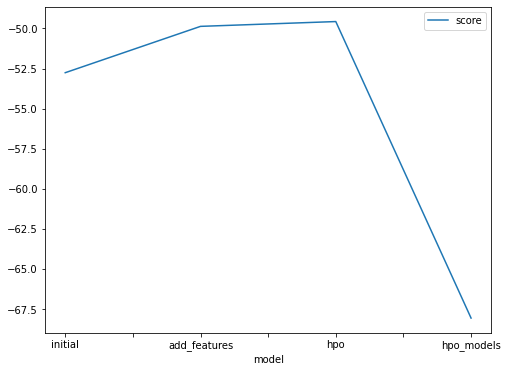

In [64]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)

# Select the top model
best_model_score = predictor.leaderboard(silent=True).iloc[0,1]
best_model_new_features_score = predictor_new_features.leaderboard(silent=True).iloc[0,1]
best_model_hpo_score = predictor_new_hpo.leaderboard(silent=True).iloc[0,1]
best_model_models_hpo_score = predictor_new_model_hpo.leaderboard(silent=True).iloc[0,1]


fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "hpo_models"],
        "score": [best_model_score, best_model_new_features_score, best_model_hpo_score, best_model_models_hpo_score]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

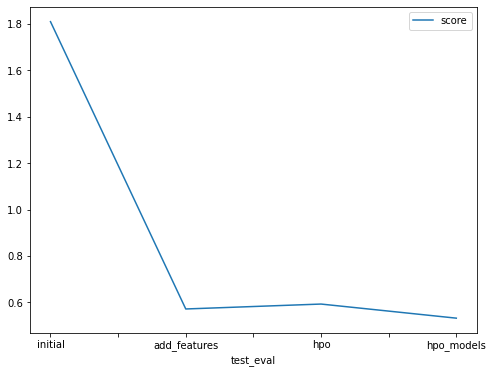

In [65]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "hpo_models"],
        "score": [1.80999, 0.57182, 0.59301, 0.53222]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [67]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo", "hpo_models"],
    "num_bag_folds": [0, 0, 10, 10],
    "num_bag_sets": [20, 20, 30, 30],
    "num_stack_levels": [0, 0, 2, 2],
    "models_hyperparameter_status": ['default', 'default', 'default', 'custom'],
    "score": [1.80999, 0.57182, 0.59301, 0.53222]
})

,model,num_bag_folds,num_bag_sets,num_stack_levels,models_hyperparameter_status,score
0,initial,0,20,0,default,1.80999
1,add_features,0,20,0,default,0.57182
2,hpo,10,30,2,default,0.59301
3,hpo_models,10,30,2,custom,0.53222
